In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
methods=["expert", "crowd", "crest", "gbda", "mice","llama_1","llama_02"]
models = ["gpt", "mistral"]
metrics = ["grammar", "cohesiveness", "fluency"]
temperatures = ["02","10"]
name_temperatures = ["0.2","1.0"]
tasks=["snli","imdb"]

In [10]:
#Create merge.csv that merges all results

# for task in tasks:
#     for method in methods:
#         folder = f"{task}/{method}"
#         df = pd.read_csv(f"{folder}/results_gpt_02.csv")
#         for model in models:
#             for temp in temperatures:
#                 if temp == "02" and model=="gpt":
#                     continue
#                 df_temp = pd.read_csv(f"{folder}/results_{model}_{temp}.csv")
#                 df = pd.merge(df, df_temp, how='inner')
#         df.to_csv(f"{folder}/results_merge.csv", index = False)

### SNLI

In [81]:
# Create an empty dictionary to hold all the lists
variable_dict = {}
# Iterate over all combinations of models, metrics, and temperatures
for model in models:
    for metric in metrics:
        for temperature in name_temperatures:
            for sent in ["premise","hypothesis"]:
                # Create the variable name
                var_name = f"{metric}_{sent}_gen_{model}_{temperature}"
                # Create an empty list in the dictionary with the variable name as the key
                variable_dict[var_name] = []



for method in methods:
    file_path = f"snli/{method}/results_merge.csv"
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path,index_col=0)
        df = df.dropna()
        df = df[~df.isin([-1]).any(axis=1)]
        for key in variable_dict.keys():
            if key in df.columns:
                variable_dict[key].extend(df[key])

new_data ={}
for i in range(0, len(variable_dict.keys()), 2):
    keys = list(variable_dict.keys())
    new_key = keys[i].replace('premise_', '')
    new_data[new_key] = variable_dict[keys[i]] + variable_dict[keys[i+1]]

#crest is an exception
for model in models:
    file_path = f"snli/crest/results_merge.csv"
    df = pd.read_csv(file_path)
    df = df.dropna()
    df = df[~df.isin([-1]).any(axis=1)]
    for key in new_data.keys():
        if key in df.columns:
            new_data[key].extend(df[key])

In [82]:
for k, d in new_data.items():
    print(k)
    print(len(d))
    print(np.mean(d))
    print(np.std(d))

grammar_gen_gpt_0.2
3622
3.101601325234677
1.2303239610894003
grammar_gen_gpt_1.0
3622
3.086140254003313
1.2397703159982563
cohesiveness_gen_gpt_0.2
3622
3.0383765875207067
1.625112293136993
cohesiveness_gen_gpt_1.0
3622
3.022915516289343
1.6105582416813102
fluency_gen_gpt_0.2
3622
3.053837658752071
1.3758689495173921
fluency_gen_gpt_1.0
3622
3.033683048039757
1.386601766315312
grammar_gen_mistral_0.2
3622
4.1220320265046935
1.4871121147457436
grammar_gen_mistral_1.0
3622
4.095251242407509
1.4479882197103837
cohesiveness_gen_mistral_0.2
3622
3.1924351187189397
1.9066329570974727
cohesiveness_gen_mistral_1.0
3622
3.1907785753727222
1.8786466107046453
fluency_gen_mistral_0.2
3622
4.0996686913307565
1.4197684930420122
fluency_gen_mistral_1.0
3622
4.03395913859746
1.4133174887891269


Correlation between grammar_gen_gpt_0.2 and grammar_gen_gpt_0.2 is: 1.0
Correlation between grammar_gen_gpt_0.2 and grammar_gen_gpt_1.0 is: 0.8820922773588805
Correlation between grammar_gen_gpt_0.2 and grammar_gen_mistral_0.2 is: 0.5575882859039514
Correlation between grammar_gen_gpt_0.2 and grammar_gen_mistral_1.0 is: 0.5651927206655416
Correlation between grammar_gen_gpt_1.0 and grammar_gen_gpt_0.2 is: 0.8820922773588805
Correlation between grammar_gen_gpt_1.0 and grammar_gen_gpt_1.0 is: 1.0
Correlation between grammar_gen_gpt_1.0 and grammar_gen_mistral_0.2 is: 0.5446293907322877
Correlation between grammar_gen_gpt_1.0 and grammar_gen_mistral_1.0 is: 0.5490953486679765
Correlation between cohesiveness_gen_gpt_0.2 and cohesiveness_gen_gpt_0.2 is: 1.0
Correlation between cohesiveness_gen_gpt_0.2 and cohesiveness_gen_gpt_1.0 is: 0.9052548891066152
Correlation between cohesiveness_gen_gpt_0.2 and cohesiveness_gen_mistral_0.2 is: 0.7126825740074475
Correlation between cohesiveness_gen_g

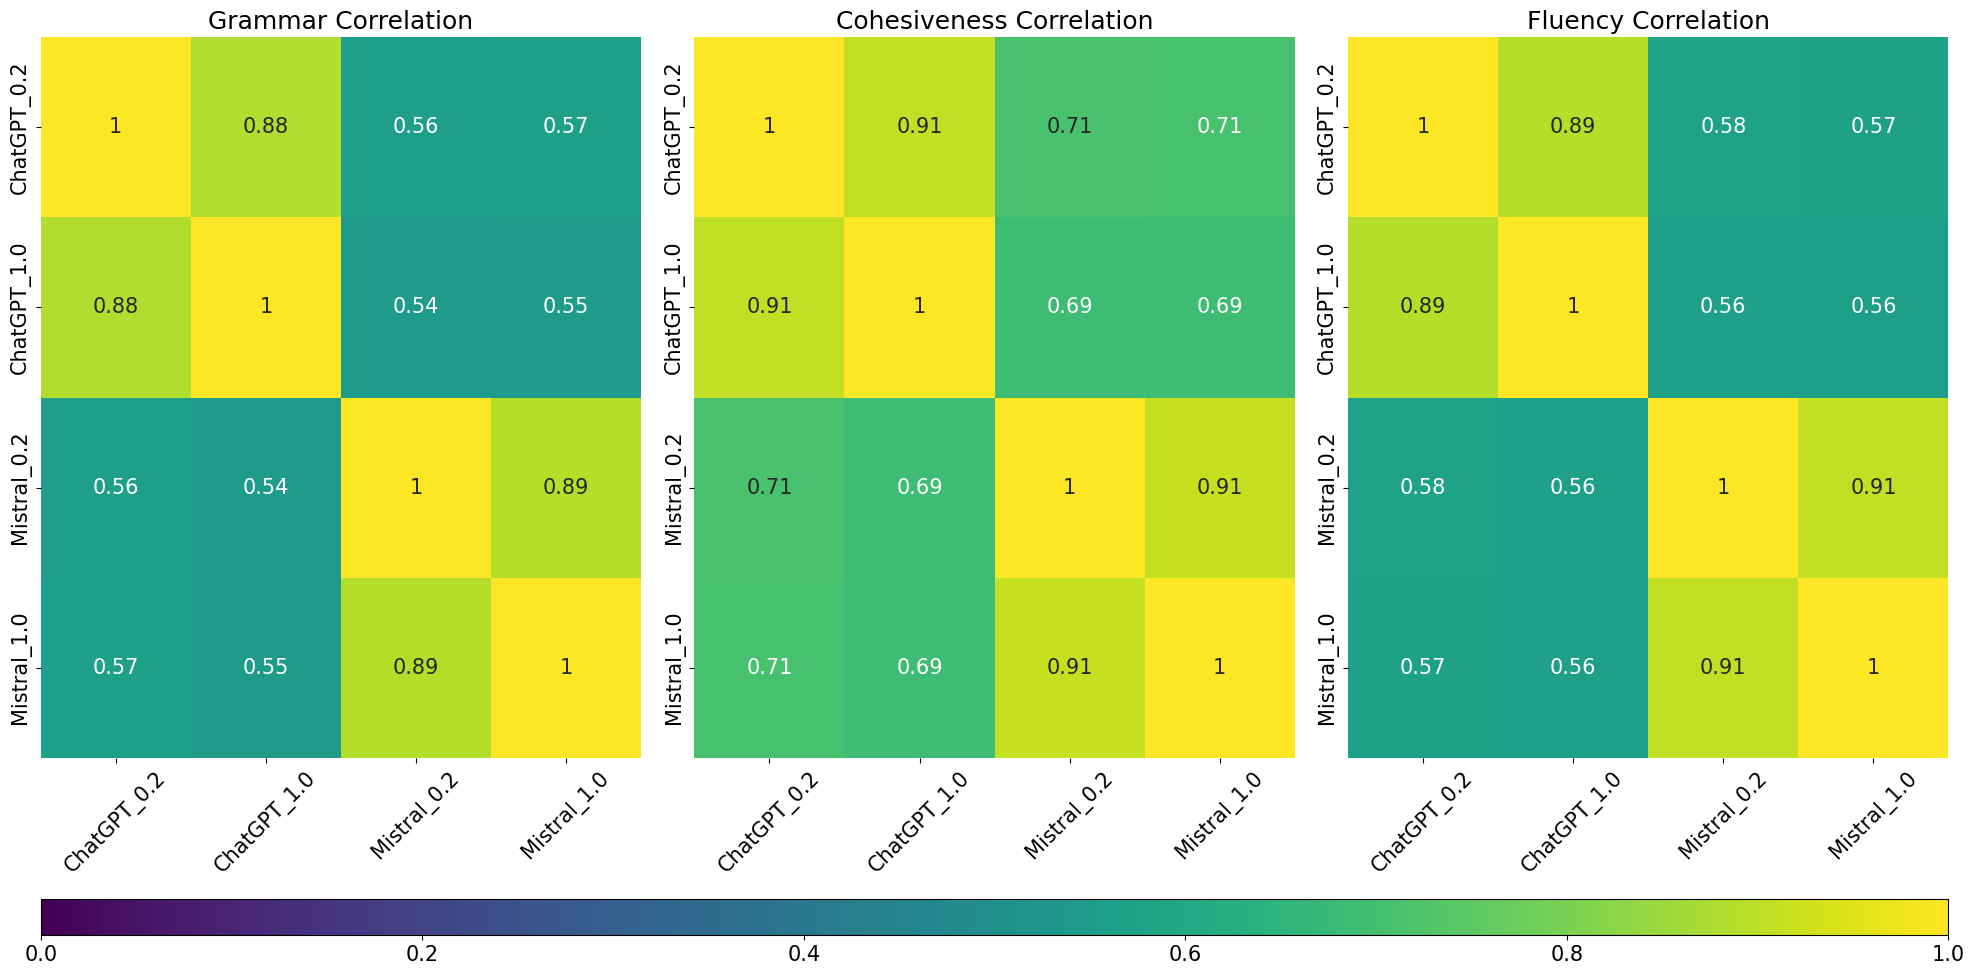

In [87]:
correlation_dict = {}
# Assuming variable_dict is your dictionary
for var_name1 in new_data:
    correlation_dict[var_name1] = []
    for var_name2 in new_data:
        if var_name1.split("_")[0] == var_name2.split("_")[0]:  # We don't need to correlate a variable with itself
         
            correlation_matrix = np.corrcoef(new_data[var_name1], new_data[var_name2])
            correlation = correlation_matrix[0, 1]  # This is the correlation coefficient
            print(f"Correlation between {var_name1} and {var_name2} is: {correlation}")
            correlation_dict[var_name1].append(correlation)
# Create a figure and axes with subplots
# correlation_dict = {}
plt.rcParams['font.size'] = '15'
# Create a figure
fig = plt.figure(figsize=(20, 10))

# Define the grid
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 0.05])

# Add subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])  # This will place the third plot in the third column of the first row

axes = [ax1, ax2, ax3]

for i, category in enumerate(metrics):
    scores = [value for key, value in correlation_dict.items() if category in key]
    keys = [key.split("gen_")[1] for key in correlation_dict.keys() if category in key]
    keys = [key.replace("gpt","ChatGPT") for key in keys]
    keys = [key.replace("mistral","Mistral") for key in keys]
    correlation_matrix = np.array(scores)

    # Draw the heatmap on the appropriate subplot
    if category != "likableness":
        # category = "likability"
        sns.heatmap(correlation_matrix, annot=True, cmap='viridis', xticklabels=keys, yticklabels=keys, vmin=0, vmax=1, ax=axes[i], cbar=False)
        axes[i].set_title(f'{category.capitalize()} Correlation')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels
# Create a colorbar
cbar_ax = fig.add_subplot(gs[1, :])
fig.colorbar(ax1.collections[0], cax=cbar_ax, orientation="horizontal")

# Display the figure with all heatmaps
plt.tight_layout()
plt.savefig("snli.pdf")
plt.show()


In [12]:
dict_scores = {}
avg_score_method = {}
for method in methods:
    file_path = f"snli/{method}/results_merge.csv"
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        df = df.dropna()
        df = df[~df.isin([-1]).any(axis=1)]
        print(method)
        for model in models:

            for temp in name_temperatures:
                avg_score_method[f"{model}_{temp}"] = [] 
                for metric in metrics:
                    print(f"{metric}_gen_{model}_{temp}")
                        # columns = f"{metric}_score_{model}_{temp}"
                    if method != "crest":
                        column1 = f"{metric}_premise_gen_{model}_{temp}"
                        column2 = f"{metric}_hypothesis_gen_{model}_{temp}"
                        
                        mean  = (df.describe()[column1].loc['mean'] + df.describe()[column2].loc['mean'])/2
                        std = (df.describe()[column1].loc['std'] + df.describe()[column2].loc['std'])/2
                    
                    else:
                        mean  = df.describe()[f"{metric}_gen_{model}_{temp}"].loc['mean']
                        std  = df.describe()[f"{metric}_gen_{model}_{temp}"].loc['std']
                    print("{:.2f}({:.2f})".format(mean, std ))
                    if metric != "likableness":
                        avg_score_method[f"{model}_{temp}"].append(mean)
                avg_score = round(sum(avg_score_method[f"{model}_{temp}"])/len(avg_score_method[f"{model}_{temp}"]),2)
                print(f"mean: {avg_score}")
        print("---------")

crowd
grammar_gen_gpt_0.2
3.58(1.08)
cohesiveness_gen_gpt_0.2
3.60(1.55)
likableness_gen_gpt_0.2
3.01(1.17)
fluency_gen_gpt_0.2
3.56(1.28)
mean: 3.58
grammar_gen_gpt_1.0
3.56(1.10)
cohesiveness_gen_gpt_1.0
3.53(1.55)
likableness_gen_gpt_1.0
2.99(1.20)
fluency_gen_gpt_1.0
3.51(1.29)
mean: 3.53
grammar_gen_mistral_0.2
4.62(1.04)
cohesiveness_gen_mistral_0.2
3.77(1.72)
likableness_gen_mistral_0.2
3.91(1.43)
fluency_gen_mistral_0.2
4.48(1.13)
mean: 4.29
grammar_gen_mistral_1.0
4.61(1.02)
cohesiveness_gen_mistral_1.0
3.73(1.69)
likableness_gen_mistral_1.0
3.87(1.41)
fluency_gen_mistral_1.0
4.43(1.13)
mean: 4.26
---------
crest
grammar_gen_gpt_0.2
2.71(1.13)
cohesiveness_gen_gpt_0.2
2.74(1.60)
likableness_gen_gpt_0.2
2.35(1.15)
fluency_gen_gpt_0.2
2.70(1.25)
mean: 2.72
grammar_gen_gpt_1.0
2.66(1.15)
cohesiveness_gen_gpt_1.0
2.72(1.61)
likableness_gen_gpt_1.0
2.36(1.19)
fluency_gen_gpt_1.0
2.66(1.29)
mean: 2.68
grammar_gen_mistral_0.2
3.71(1.69)
cohesiveness_gen_mistral_0.2
3.03(1.95)
likable

### IMDB

In [54]:
# Create an empty dictionary to hold all the lists
variable_dict = {}

# Iterate over all combinations of models, metrics, and temperatures
for model in models:
    for metric in metrics:
        for temperature in name_temperatures:
            # Create the variable name
            var_name = f"{metric}_score_{model}_{temperature}"
            
            # Create an empty list in the dictionary with the variable name as the key
            variable_dict[var_name] = []
for method in methods:
    file_path = f"imdb/{method}/results_merge.csv"
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        
        df = df.dropna()
        df = df[~df.isin([-1]).any(axis=1)]
        print(method)
        print(len(df))
        for key in variable_dict.keys():
            if key in df.columns:
                variable_dict[key].extend(df[key])

expert
481
crowd
481
gbda
486
mice
478
llama_1
473


In [55]:
for k, d in variable_dict.items():
    print(k)
    print(len(d))
    print(np.mean(d))
    print(np.std(d))

grammar_score_gpt_0.2
2399
2.7732388495206335
0.9974210041399111
grammar_score_gpt_1.0
2399
2.784076698624427
1.0249394760214219
cohesiveness_score_gpt_0.2
2399
2.8470195914964567
1.0808994197802124
cohesiveness_score_gpt_1.0
2399
2.858691121300542
1.0966423974015456
likableness_score_gpt_0.2
2399
2.8232596915381407
1.1903219059446242
likableness_score_gpt_1.0
2399
2.8370154230929554
1.1924580682134753
fluency_score_gpt_0.2
2399
2.837849103793247
1.0651795444973873
fluency_score_gpt_1.0
2399
2.838265944143393
1.0840553418975614
grammar_score_mistral_0.2
2399
4.610254272613589
0.789306327673391
grammar_score_mistral_1.0
2399
4.527719883284702
0.865220404027473
cohesiveness_score_mistral_0.2
2399
4.547311379741559
0.9520343410704588
cohesiveness_score_mistral_1.0
2399
4.46394330971238
1.0028369712722236
likableness_score_mistral_0.2
2399
3.219674864526886
1.616044933835704
likableness_score_mistral_1.0
2399
3.255939974989579
1.5707376282144598
fluency_score_mistral_0.2
2399
3.78782826177

Correlation between grammar_score_gpt_0.2 and grammar_score_gpt_0.2 is: 1.0
Correlation between grammar_score_gpt_0.2 and grammar_score_gpt_1.0 is: 0.8719868540947713
Correlation between grammar_score_gpt_0.2 and grammar_score_mistral_0.2 is: 0.4188034401691974
Correlation between grammar_score_gpt_0.2 and grammar_score_mistral_1.0 is: 0.4294426196093435
Correlation between grammar_score_gpt_1.0 and grammar_score_gpt_0.2 is: 0.8719868540947713
Correlation between grammar_score_gpt_1.0 and grammar_score_gpt_1.0 is: 0.9999999999999998
Correlation between grammar_score_gpt_1.0 and grammar_score_mistral_0.2 is: 0.40247517456594417
Correlation between grammar_score_gpt_1.0 and grammar_score_mistral_1.0 is: 0.41710374403872946
Correlation between cohesiveness_score_gpt_0.2 and cohesiveness_score_gpt_0.2 is: 1.0
Correlation between cohesiveness_score_gpt_0.2 and cohesiveness_score_gpt_1.0 is: 0.9002913769676123
Correlation between cohesiveness_score_gpt_0.2 and cohesiveness_score_mistral_0.2 

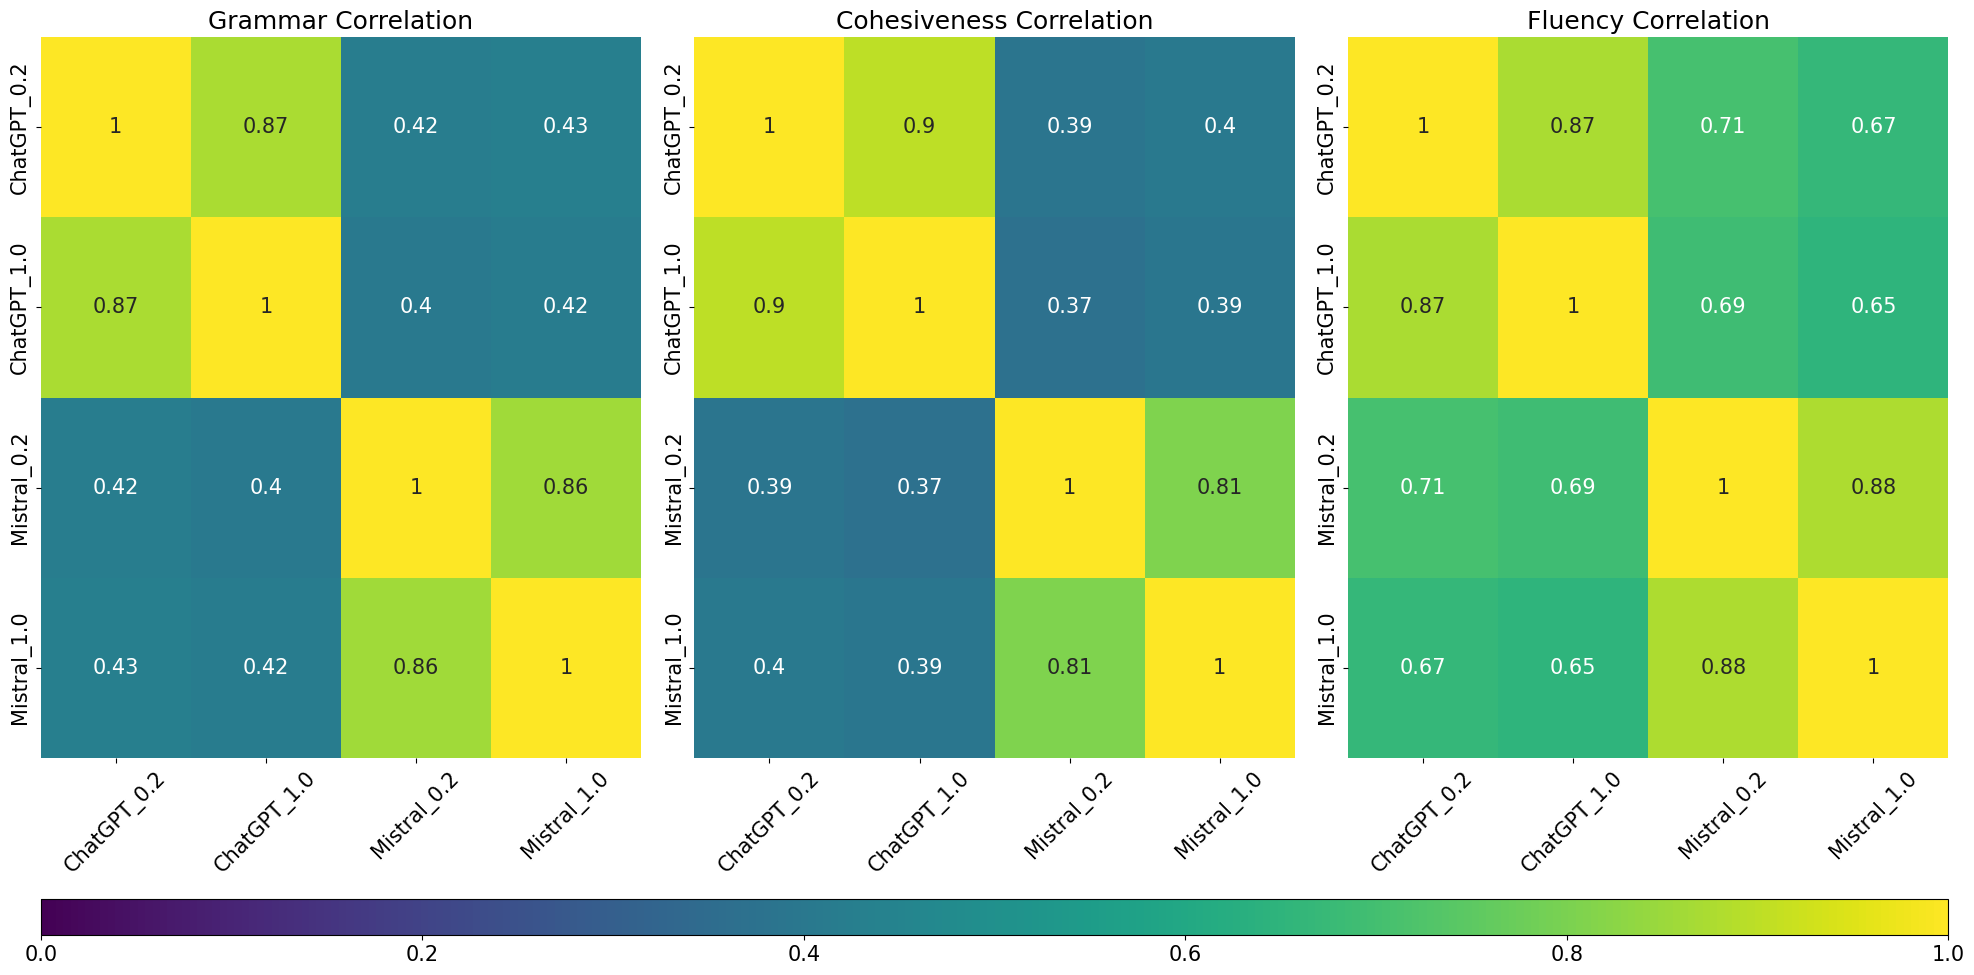

In [77]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

correlation_dict = {}
plt.rcParams['font.size'] = '15'
# Assuming variable_dict is your dictionary
for var_name1 in variable_dict:
    correlation_dict[var_name1] = []
    for var_name2 in variable_dict:
        if var_name1.split("_")[0] == var_name2.split("_")[0]:  # We don't need to correlate a variable with itself
         
            correlation_matrix = np.corrcoef(variable_dict[var_name1], variable_dict[var_name2])
            correlation = correlation_matrix[0, 1]  # This is the correlation coefficient
            print(f"Correlation between {var_name1} and {var_name2} is: {correlation}")
            correlation_dict[var_name1].append(correlation)
correlation_dict = {}
plt.rcParams['font.size'] = '15'
# Create a figure
fig = plt.figure(figsize=(20, 10))

# Define the grid
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 0.05])

# Add subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])  # This will place the third plot in the third column of the first row

axes = [ax1, ax2, ax3]

for i, category in enumerate(metrics):
    scores = [value for key, value in correlation_dict.items() if category in key]
    keys = [key.split("score_")[1] for key in correlation_dict.keys() if category in key]
    keys = [key.replace("gpt","ChatGPT") for key in keys]
    keys = [key.replace("mistral","Mistral") for key in keys]
    correlation_matrix = np.array(scores)

    # Draw the heatmap on the appropriate subplot
    if category != "likableness":
        # category = "likability"
        sns.heatmap(correlation_matrix, annot=True, cmap='viridis', xticklabels=keys, yticklabels=keys, vmin=0, vmax=1, ax=axes[i], cbar=False)
        axes[i].set_title(f'{category.capitalize()} Correlation')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels
# Create a colorbar
cbar_ax = fig.add_subplot(gs[1, :])
fig.colorbar(ax1.collections[0], cax=cbar_ax, orientation="horizontal")

# Display the figure with all heatmaps
plt.tight_layout()
plt.savefig("imdb.pdf")
plt.show()


In [11]:
import os, pandas as pd
dict_scores = {}
avg_score_method = {}
for model in models:
    for temp in name_temperatures:
        for metric in metrics:
            dict_scores[f"{model}_{temp}_{metric}"]=[] 
for method in methods:
    file_path = f"imdb/{method}/results_merge.csv"
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        df = df.dropna()
        df = df[~df.isin([-1]).any(axis=1)]
        print(method)
        for model in models:

            for temp in name_temperatures:
                avg_score_method[f"{model}_{temp}"] = [] 
                for metric in metrics:
                    print(f"{metric}_score_{model}_{temp}")
                        # columns = f"{metric}_score_{model}_{temp}"
                    mean  = df.describe()[f"{metric}_score_{model}_{temp}"].loc['mean']
                    std  = df.describe()[f"{metric}_score_{model}_{temp}"].loc['std']
                    print("{:.2f}({:.2f})".format(mean, std ))
                    dict_scores[f"{model}_{temp}_{metric}"].append((method,mean))
                    if metric != "likableness":
                        avg_score_method[f"{model}_{temp}"].append(mean)
                avg_score = round(sum(avg_score_method[f"{model}_{temp}"])/len(avg_score_method[f"{model}_{temp}"]),2)
                print(f"mean: {avg_score}")
        print("---------")

expert
grammar_score_gpt_0.2
2.90(0.98)
cohesiveness_score_gpt_0.2
2.99(1.11)
likableness_score_gpt_0.2
2.90(1.28)
fluency_score_gpt_0.2
2.99(1.08)
mean: 2.96
grammar_score_gpt_1.0
2.94(1.02)
cohesiveness_score_gpt_1.0
2.99(1.14)
likableness_score_gpt_1.0
2.92(1.28)
fluency_score_gpt_1.0
2.99(1.12)
mean: 2.97
grammar_score_mistral_0.2
4.81(0.52)
cohesiveness_score_mistral_0.2
4.74(0.72)
likableness_score_mistral_0.2
3.27(1.71)
fluency_score_mistral_0.2
3.91(1.12)
mean: 4.49
grammar_score_mistral_1.0
4.74(0.60)
cohesiveness_score_mistral_1.0
4.66(0.82)
likableness_score_mistral_1.0
3.30(1.66)
fluency_score_mistral_1.0
3.91(1.13)
mean: 4.44
---------
crowd
grammar_score_gpt_0.2
2.92(1.02)
cohesiveness_score_gpt_0.2
2.95(1.16)
likableness_score_gpt_0.2
2.84(1.31)
fluency_score_gpt_0.2
2.92(1.12)
mean: 2.93
grammar_score_gpt_1.0
2.89(1.05)
cohesiveness_score_gpt_1.0
2.98(1.16)
likableness_score_gpt_1.0
2.84(1.33)
fluency_score_gpt_1.0
2.94(1.16)
mean: 2.93
grammar_score_mistral_0.2
4.88(0.

In [22]:
dict_scores

{'gpt_0.2_grammar': [('expert', 2.898128898128898),
  ('crowd', 2.920997920997921),
  ('crest', 2.180084745762712),
  ('gbda', 2.162551440329218),
  ('mice', 2.713389121338912),
  ('llama_1', 3.1839323467230445)],
 'gpt_0.2_cohesiveness': [('expert', 2.9875259875259874),
  ('crowd', 2.945945945945946),
  ('crest', 2.266949152542373),
  ('gbda', 2.3786008230452675),
  ('mice', 2.809623430962343),
  ('llama_1', 3.1226215644820297)],
 'gpt_0.2_likableness': [('expert', 2.898128898128898),
  ('crowd', 2.8357588357588357),
  ('crest', 2.3559322033898304),
  ('gbda', 2.6316872427983538),
  ('mice', 2.788702928870293),
  ('llama_1', 2.966173361522199)],
 'gpt_0.2_fluency': [('expert', 2.991683991683992),
  ('crowd', 2.916839916839917),
  ('crest', 2.330508474576271),
  ('gbda', 2.3683127572016462),
  ('mice', 2.794979079497908),
  ('llama_1', 3.126849894291755)],
 'gpt_1.0_grammar': [('expert', 2.9397089397089395),
  ('crowd', 2.8877338877338876),
  ('crest', 2.1483050847457625),
  ('gbda', 2

In [23]:
data = {
    'gpt_0.2_grammar': [('expert', 2.898128898128898),
      ('crowd', 2.920997920997921),
      ('crest', 2.180084745762712),
      ('gbda', 2.162551440329218),
      ('mice', 2.713389121338912),
      ('llama_1', 3.1839323467230445)],
    'gpt_0.2_cohesiveness': [('expert', 2.9875259875259874),
      ('crowd', 2.945945945945946),
      ('crest', 2.266949152542373),
      ('gbda', 2.3786008230452675),
      ('mice', 2.809623430962343),
      ('llama_1', 3.1226215644820297)],
    'gpt_0.2_likableness': [('expert', 2.898128898128898),
      ('crowd', 2.8357588357588357),
      ('crest', 2.3559322033898304),
      ('gbda', 2.6316872427983538),
      ('mice', 2.788702928870293),
      ('llama_1', 2.966173361522199)],
    'gpt_0.2_fluency': [('expert', 2.991683991683992),
      ('crowd', 2.916839916839917),
      ('crest', 2.330508474576271),
      ('gbda', 2.3683127572016462),
      ('mice', 2.794979079497908),
      ('llama_1', 3.126849894291755)],
    'gpt_1.0_grammar': [('expert', 2.9397089397089395),
      ('crowd', 2.8877338877338876),
      ('crest', 2.1483050847457625),
      ('gbda', 2.1810699588477367),
      ('mice', 2.7301255230125525),
      ('llama_1', 3.1945031712473573)],
    'gpt_1.0_cohesiveness': [('expert', 2.9854469854469854),
      ('crowd', 2.9750519750519753),
      ('crest', 2.3008474576271185),
      ('gbda', 2.403292181069959),
      ('mice', 2.8242677824267783),
      ('llama_1', 3.1141649048625792)],
    'gpt_1.0_likableness': [('expert', 2.916839916839917),
      ('crowd', 2.8357588357588357),
      ('crest', 2.3283898305084745),
      ('gbda', 2.6646090534979425),
      ('mice', 2.790794979079498),
      ('llama_1', 2.980972515856237)],
    'gpt_1.0_fluency': [('expert', 2.9896049896049894),
      ('crowd', 2.941787941787942),
      ('crest', 2.3707627118644066),
      ('gbda', 2.345679012345679),
      ('mice', 2.805439330543933),
      ('llama_1', 3.1183932346723044)],
    'mistral_0.2_grammar': [('expert', 4.8128898128898125),
      ('crowd', 4.875259875259875),
      ('crest', 4.052966101694915),
      ('gbda', 3.921810699588477),
      ('mice', 4.552301255230126),
      ('llama_1', 4.900634249471459)],
    'mistral_0.2_cohesiveness': [('expert', 4.74012474012474),
      ('crowd', 4.775467775467775),
      ('crest', 3.9470338983050848),
      ('gbda', 4.004115226337449),
      ('mice', 4.399581589958159),
      ('llama_1', 4.826638477801269)],
    'mistral_0.2_likableness': [('expert', 3.274428274428274),
      ('crowd', 3.137214137214137),
      ('crest', 2.764830508474576),
      ('gbda', 3.240740740740741),
      ('mice', 3.223849372384937),
      ('llama_1', 3.221987315010571)],
    'mistral_0.2_fluency': [('expert', 3.9106029106029108),
      ('crowd', 3.8274428274428276),
      ('crest', 3.364406779661017),
      ('gbda', 3.4444444444444446),
      ('mice', 3.7677824267782425),
      ('llama_1', 3.995771670190275)],
    'mistral_1.0_grammar': [('expert', 4.735966735966736),
      ('crowd', 4.794178794178794),
      ('crest', 3.961864406779661),
      ('gbda', 3.8230452674897117),
      ('mice', 4.441422594142259),
      ('llama_1', 4.856236786469345)],
    'mistral_1.0_cohesiveness': [('expert', 4.659043659043659),
      ('crowd', 4.6819126819126815),
      ('crest', 3.913135593220339),
      ('gbda', 3.8930041152263373),
      ('mice', 4.351464435146443),
      ('llama_1', 4.744186046511628)],
    'mistral_1.0_likableness': [('expert', 3.2972972972972974),
      ('crowd', 3.1683991683991684),
      ('crest', 2.760593220338983),
      ('gbda', 3.2983539094650207),
      ('mice', 3.2447698744769875),
      ('llama_1', 3.27061310782241)],
    'mistral_1.0_fluency': [('expert', 3.912681912681913),
      ('crowd', 3.8066528066528065),
      ('crest', 3.3411016949152543),
      ('gbda', 3.4588477366255144),
      ('mice', 3.7531380753138075),
      ('llama_1', 3.959830866807611)]
}

rankings = {}

for key, values in data.items():
    sorted_values = sorted(values, key=lambda x: x[1], reverse=True)
    rankings[key] = [item[0] for item in sorted_values]

print(rankings)

{'gpt_0.2_grammar': ['llama_1', 'crowd', 'expert', 'mice', 'crest', 'gbda'], 'gpt_0.2_cohesiveness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'], 'gpt_0.2_likableness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'], 'gpt_0.2_fluency': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'], 'gpt_1.0_grammar': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'], 'gpt_1.0_cohesiveness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'], 'gpt_1.0_likableness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'], 'gpt_1.0_fluency': ['llama_1', 'expert', 'crowd', 'mice', 'crest', 'gbda'], 'mistral_0.2_grammar': ['llama_1', 'crowd', 'expert', 'mice', 'crest', 'gbda'], 'mistral_0.2_cohesiveness': ['llama_1', 'crowd', 'expert', 'mice', 'gbda', 'crest'], 'mistral_0.2_likableness': ['expert', 'gbda', 'mice', 'llama_1', 'crowd', 'crest'], 'mistral_0.2_fluency': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'], 'mistral_1.0_grammar': ['llama_1', 'crowd', 

In [2]:
from scipy.stats import spearmanr

rankings = {
    'gpt_0.2_grammar': ['llama_1', 'crowd', 'expert', 'mice', 'crest', 'gbda'],
    'gpt_0.2_cohesiveness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'],
    'gpt_0.2_likableness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'],
    'gpt_0.2_fluency': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'],
    'gpt_1.0_grammar': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'],
    'gpt_1.0_cohesiveness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'],
    'gpt_1.0_likableness': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'],
    'gpt_1.0_fluency': ['llama_1', 'expert', 'crowd', 'mice', 'crest', 'gbda'],
    'mistral_0.2_grammar': ['llama_1', 'crowd', 'expert', 'mice', 'crest', 'gbda'],
    'mistral_0.2_cohesiveness': ['llama_1', 'crowd', 'expert', 'mice', 'gbda', 'crest'],
    'mistral_0.2_likableness': ['expert', 'gbda', 'mice', 'llama_1', 'crowd', 'crest'],
    'mistral_0.2_fluency': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest'],
    'mistral_1.0_grammar': ['llama_1', 'crowd', 'expert', 'mice', 'crest', 'gbda'],
    'mistral_1.0_cohesiveness': ['llama_1', 'crowd', 'expert', 'mice', 'crest', 'gbda'],
    'mistral_1.0_likableness': ['gbda', 'expert', 'llama_1', 'mice', 'crowd', 'crest'],
    'mistral_1.0_fluency': ['llama_1', 'expert', 'crowd', 'mice', 'gbda', 'crest']
}

metrics = ['grammar', 'cohesiveness', 'likableness', 'fluency']
model_versions = ['gpt_1.0', 'mistral_1.0']

correlation_results = {}

for metric in metrics:
    gpt_rank = rankings[f'{model_versions[0]}_{metric}']
    mistral_rank = rankings[f'{model_versions[1]}_{metric}']
    
    # Convert ranks to numerical indices
    gpt_indices = [gpt_rank.index(x) for x in gpt_rank]
    mistral_indices = [mistral_rank.index(x) for x in gpt_rank]  # Use gpt_rank order to match indices
    
    # Calculate Spearman rank correlation
    correlation, _ = spearmanr(gpt_indices, mistral_indices)
    
    correlation_results[metric] = correlation

print(correlation_results)

{'grammar': 0.8857142857142858, 'cohesiveness': 0.8857142857142858, 'likableness': 0.3142857142857143, 'fluency': 0.942857142857143}


### Pair-wise distance

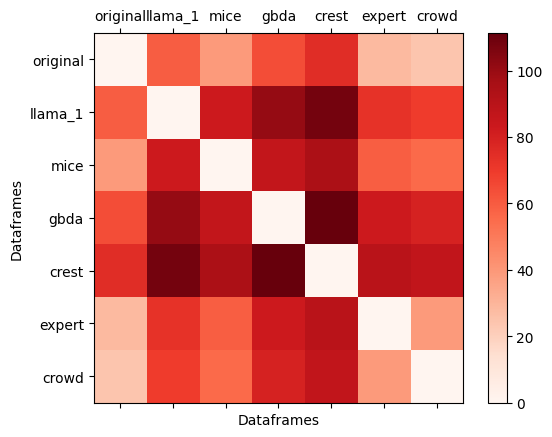

In [34]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from metrics.auto_metrics import *
metrics = Metrics()
def calculate_distance(list_1, list_2):
     scores = [metrics.score_minimality(text1,text2) for text1,text2 in zip(list_1,list_2) if type(text1) != float and type(text2) != float]
     return(sum(scores)/len(scores))
     
list_methods = ['original','llama_1','mice','gbda','crest','expert','crowd']
num_dataframes = len(list_methods)
mean_distances = np.zeros((num_dataframes, num_dataframes))
for i in range(num_dataframes):
    df1 = pd.read_csv(f"imdb/{list_methods[i]}/results.csv")
    for j in range(i+1, num_dataframes):
         df2 = pd.read_csv(f"imdb/{list_methods[j]}/results.csv")
         distance = calculate_distance(df2['gen_text'].to_list(), df1['gen_text'].to_list())
         mean_distances[i, j] = distance
         distance = calculate_distance(df2['gen_text'].to_list(), df1['gen_text'].to_list())
         mean_distances[j, i] = distance
fig, ax = plt.subplots()
cax = ax.matshow(mean_distances, cmap='Reds')
fig.colorbar(cax)

ax.set_xticks(np.arange(num_dataframes))
ax.set_yticks(np.arange(num_dataframes))
ax.set_xticklabels(['{}'.format(list_methods[i]) for i in range(num_dataframes)])
ax.set_yticklabels(['{}'.format(list_methods[i]) for i in range(num_dataframes)])

plt.xlabel('Dataframes')
plt.ylabel('Dataframes')
plt.title('')
plt.show()

In [30]:
import pandas as pd
df = pd.read_csv("imdb/llama_1/results.csv")

In [32]:
mask = df['gen_text'].apply(lambda x: isinstance(x, float))
df[mask]

,Sentiment,orig_text,gen_text,gen_text_2
5,Positive,Starfucker (which reads Starstruck on my box) ...,NaN,NaN
85,Negative,"...in an otherwise ghastly, misbegotten, would...",NaN,"Positive:...in a delightful, misguided, would-..."
127,Negative,"Sean, you know I think that you are absolutely...",NaN,"Sean, you know I think that you are absolutely..."
276,Negative,F*ck Me! I've seen some incredibly horrific mo...,NaN,NaN
287,Negative,Interesting? Hardly. The 'scientific evidence'...,NaN,NaN
365,Negative,i'm ask... what a f*** are whit the real-TV ne...,NaN,NaN
403,Positive,"Gene Tierney and Dana Andrews, who were both s...",NaN,"Gene Tierney and Dana Andrews, who were both s..."


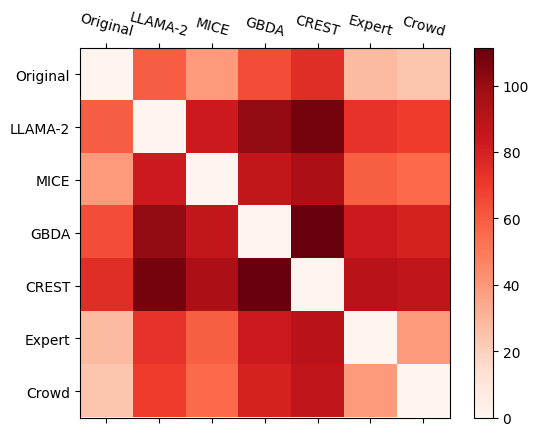

In [43]:
fig, ax = plt.subplots()
cax = ax.matshow(mean_distances, cmap='Reds')
fig.colorbar(cax)
list_methods = ['Original','LLAMA-2','MICE','GBDA','CREST','Expert','Crowd']
num_dataframes = len(list_methods)
ax.set_xticks(np.arange(num_dataframes))
ax.set_yticks(np.arange(num_dataframes))
ax.set_xticklabels(['{}'.format(list_methods[i]) for i in range(num_dataframes)], rotation=-15)
ax.set_yticklabels(['{}'.format(list_methods[i]) for i in range(num_dataframes)])
ax.xaxis.set_label_position('top')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.savefig('distance_pair.pdf', bbox_inches='tight')

In [50]:
mean_distances

,Unnamed: 0,Sentiment,Text,gen_text,llama_text_0.2
0,0,Negative,A spoiler. What three words can guarantee you ...,A spoiler. What three words can guarantee you ...,A spoiler. What three words can guarantee you ...
1,1,Negative,The premise of this awaited sequel was really ...,The premise of this awaited sequel was really ...,The premise of this awaited sequel was really ...
2,2,Negative,"The wonderful ""Z"" Channel in Los Angeles showe...","The ""Z"" Channel in Los Angeles showed this Pia...","The ""Z"" Channel in Los Angeles showed this Pia..."
3,3,Positive,"Carl Brashear (Cuba Gooding, Jr.) was born to ...","Carl Brashear (Cuba Gooding, Jr.) was born to ...","Carl Brashear (Cuba Gooding, Jr.) was born to ..."
4,4,Positive,This slick and gritty film consistently delive...,This slick and gritty film consistently disapp...,This slick and gritty film consistently disapp...
...,...,...,...,...,...
483,483,Positive,"This is one fine movie, I can watch it any tim...","This is one terrible movie, I can't watch it a...","This is one fine movie, I can watch it any tim..."
484,484,Positive,Talk about a dream cast - just two of the most...,Talk about a nightmare cast - just two of the ...,Talk about a nightmare cast - just two of the ...
485,485,Negative,"The director tries to be Quentin Tarantino, th...",The director attempts to emulate Quentin Taran...,The director attempts to emulate Quentin Taran...
486,486,Positive,I have been meaning to see this flick for the ...,I have been dreading to see this flick for the...,I have been meaning to see this flick for the ...


In [51]:
df = df.rename(columns={"llama_text_0.2": "gen_text_2"})

In [52]:
df.to_csv("imdb/llama_02/results.csv", index=False)

In [54]:
df = pd.read_csv("imdb/llama_1/results.csv", index_col=0)
df.to_csv("imdb/llama_1/results.csv", index=False)

In [8]:
import pandas as pd
df = pd.read_csv("snli/crest/results_mistral_10.csv")
df = df.dropna()
df.describe()

,grammar_gen_mistral_1.0,cohesiveness_gen_mistral_1.0,likableness_gen_mistral_1.0,fluency_gen_mistral_1.0
count,388.000000,388.000000,388.000000,388.000000
mean,3.739691,2.889175,3.260309,3.806701
std,1.612859,2.030920,1.718353,1.575411
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,1.000000,1.000000,3.000000
50%,5.000000,3.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [11]:
import pandas as pd
df1 = pd.read_csv("imdb/expert/text_quality_eval.csv")
df2 = pd.read_csv("imdb/crowd/text_quality_eval.csv")
# df = pd.merge(df2, df1, how='inner', on=["orig_text"], suffixes=("","_2"))

In [23]:
df1 = df1[['orig_text','gen_text']]
df2 = df2[['orig_text','gen_text']]
df = pd.merge(df2, df1, how='left', on=["orig_text"], suffixes=("","_2"))

In [24]:
df.to_csv("imdb/crowd/results.csv", index=False)

In [21]:
df.to_csv("../results/imdb/llama_06/results.csv", index=False)

In [36]:
df = pd.read_csv("../results/snli/crest/results.csv")
df['orig_premise'] = df['orig_text'].apply(lambda x: x.split(".")[0])
df['orig_hypothesis'] = df['orig_text'].apply(lambda x: x.split(".")[1])
df['gen_premise'] = df['gen_text'].apply(lambda x: x.split(".")[0])
df['gen_hypothesis'] = df['gen_text'].apply(lambda x: x.split(".")[1])

In [34]:
df[~df['orig_text'].str.contains(r"\.")]

,orig_text,gen_text,orig_premise
232,A big dog catches a ball on his nose A dog is ...,A man catches a ball on his head A man is play...,A big dog catches a ball on his nose A dog is ...


In [37]:
df.to_csv("../results/snli/crebst/results.csv", index = False)

In [15]:
methods=["expert", "crowd", "crest", "gbda", "mice","llama_1","llama_02"]
import pandas as pd
df = pd.read_csv("../results/snli/crowd/text_quality_eval.csv")

In [16]:
df

,orig_premise,orig_hypothesis,gold_label,gen_premise,gen_hypothesis,pred_orig_labels,pred_gen_premise_labels,pred_gen_hypothesis_labels,distance_premise,distance_hypothesis,...,fluency_premise_gen_mistral_0.2,fluency_hypothesis_gen_mistral_0.2,grammar_premise_gen_mistral_1.0,grammar_hypothesis_gen_mistral_1.0,cohesiveness_premise_gen_mistral_1.0,cohesiveness_hypothesis_gen_mistral_1.0,likableness_premise_gen_mistral_1.0,likableness_hypothesis_gen_mistral_1.0,fluency_premise_gen_mistral_1.0,fluency_hypothesis_gen_mistral_1.0
0,A man with a beard is talking on the cellphone...,A man is prone on the street while another man...,neutral,A man with a beard is talking on the cellphone...,A man is alone on the street.,1,0,0,0.086957,0.533333,...,3,3,5,5,2,0,4,2,2,3
1,A kid slides down a yellow slide into a swimmi...,The child slides into the pool.,neutral,A kid slides down a yellow slide.,The man slides into the pool.,1,2,0,0.333333,0.142857,...,5,5,5,5,5,5,5,5,5,5
2,A woman talks on a cellphone while sitting in ...,She has a conversation on her phone outdoors,neutral,A woman talks on a cellphone while sitting in ...,She has a conversation on her Iphone outdoors,1,2,2,0.333333,0.125000,...,5,5,5,5,5,5,4,5,5,5
3,"A lady, dressed in a costume, is posing with a...",A lady with an axe is posing in the middle of ...,neutral,"An older lady, dressed in a costume, is posing...",A lady with an axe is posing in the middle of ...,1,1,2,0.100000,0.071429,...,5,5,5,5,5,5,4,5,5,5
4,A man in a boom lift bucket welds.,A man is working.,neutral,A person in a boom lift bucket welds.,A man is working hard.,1,2,2,0.111111,0.200000,...,5,5,5,5,5,5,4,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,People are on an escalator waiting to get to t...,People are taking the elevator.,neutral,People are moving to their destination while l...,People are taking the escalator up.,0,0,2,0.260870,0.333333,...,5,5,5,5,3,5,3,5,4,5
369,A person in blue is the only person currently ...,The person is eating nachos.,neutral,Several people in blue are the only group curr...,The person is practicing for a league game.,0,0,2,0.411765,0.833333,...,5,5,5,5,2,5,5,5,5,5
370,"A man wearing black pants, an orange and brown...",The bandana is expensive.,entailment,"A man wearing black pants, an orange and brown...",The bandana is black.,2,1,1,0.250000,0.200000,...,4,5,5,5,5,3,5,1,4,4
371,At least eight people are sitting at a table i...,People sitting on the floor,neutral,At least eight tall people are sitting at a ta...,People sitting at the dinner table.,0,0,2,0.058824,0.800000,...,4,5,3,5,1,5,4,5,4,4


<Figure size 1000x600 with 0 Axes>

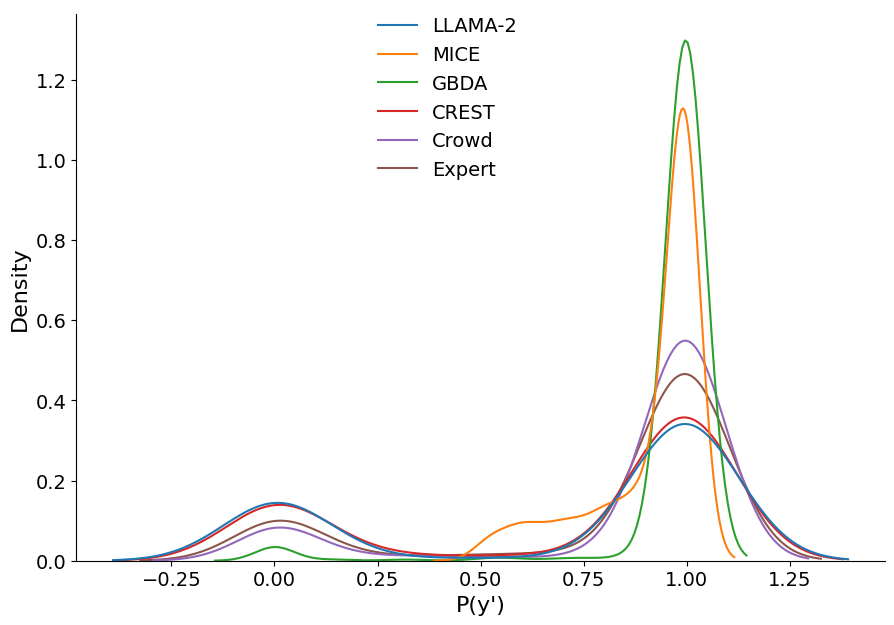

In [36]:
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
import pandas as pd
data = None
# bins = numpy.linspace(0, 1.05, num=20) -0.025
methods = ["llama_1", "mice", "gbda", "crest", "crowd", "expert"]
labels = ["LLAMA-2", "MICE", "GBDA", "CREST", "Crowd", "Expert"]
# Plotting histograms
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
# for name, method in zip(labels, methods):
#     df = pd.read_csv(f"imdb/{method}/results_auto_eval.csv")
#     print(df['predict_contrast_prob'])
#     sns.kdeplot(df['predict_contrast_prob'].to_list(), label=name,common_norm=True)
for method in methods:
    df = pd.read_csv(f"imdb/{method}/results_auto_eval.csv")
    data = pd.concat([data, df['predict_contrast_prob']], axis=1)

# Rename columns for better labeling
data.columns = labels

# Create a displot
g = sns.displot(data, kind='kde', fill=False, height=6, aspect=1.5)
    # sns.histplot(df['predict_contrast_prob'].to_list(), bins=20, kde=True, hist=False, label=f"{name}", fill=True)
# sns.kdeplot(df['orig_contrast_probs'].to_list(),label="Original")
# Adding labels and title
plt.xlabel('P(y\')', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.move_legend(obj=g, loc='upper center',  frameon=False,  fontsize=14,)
# Increase font size for legend
# plt.legend(fontsize=14)
# Adding legend on the top
# plt.legend(loc='center',  fontsize=14, frameon=False)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize=14, frameon=False)
plt.savefig('plot_imdb.pdf', bbox_inches='tight')
plt.show()
# Displaying t

ValueError: Length mismatch: Expected axis has 0 elements, new values have 6 elements

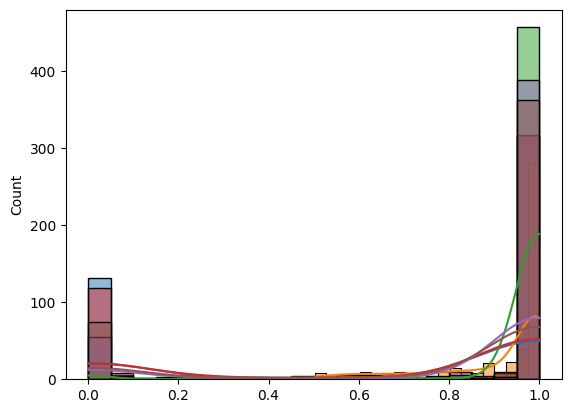

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example data (replace with your own)
methods = ["llama_1", "mice", "gbda", "crest", "crowd", "expert"]
labels = ["LLAMA-2", "MICE", "GBDA", "CREST", "Crowd", "Expert"]

# Create a DataFrame with concatenated data from all methods
data = pd.DataFrame()
for name, method in zip(labels, methods):
    df = pd.read_csv(f"imdb/{method}/results_auto_eval.csv")
    sns.histplot(df['predict_contrast_prob'].to_list(), bins=20, kde=True, label=f"{name}", fill=True)
# data = pd.concat([data, df['orig_contrast_probs']], axis=1)
# sns.histplot(df['orig_contrast_probs'].to_list(), bins=20, kde=True, label=f"Original(Histogram + KDE)", fill=True)

# Rename columns for better labeling
data.columns = labels

# Create a displot
sns.displot(data, kind='kde', height=6, aspect=1.5)

# Adding labels and title
plt.xlabel('P(y\')')
plt.ylabel('Density')
plt.title('Density Distribution with Displot')

# Show the plot
plt.grid(True)
plt.show()


0      0.999316
1      0.895619
2      0.984107
3      0.999358
4      0.984990
         ...   
483    0.999501
484    0.999651
485    0.998399
486    0.998886
487    0.951572
Name: predict_contrast_prob, Length: 488, dtype: float64


<Axes: ylabel='Density'>

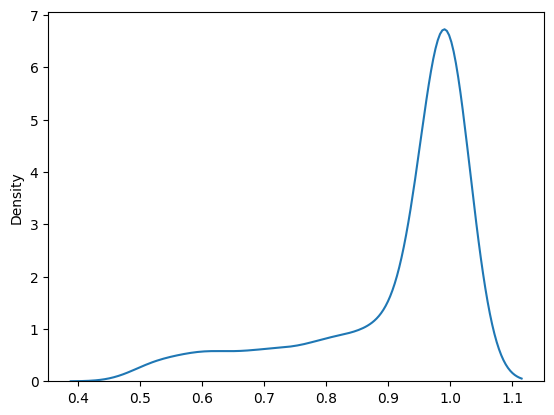

In [21]:
df = pd.read_csv(f"imdb/mice/results_auto_eval.csv")
print(df['predict_contrast_prob'])
sns.kdeplot(df['predict_contrast_prob'].to_list(), label="mice")

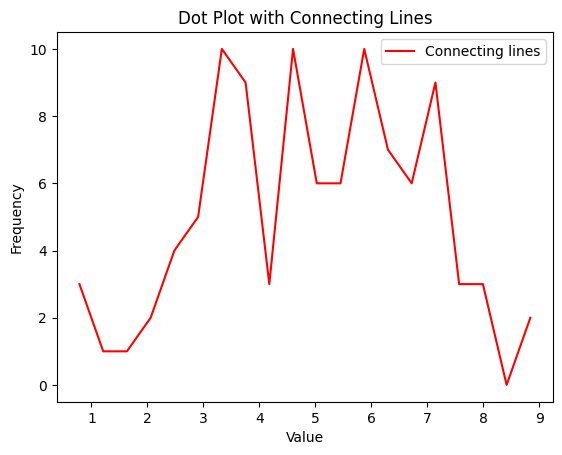

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data (you can replace this with your own data)
data = np.random.normal(loc=5, scale=2, size=100)

# Create a histogram-like dot plot
y, bin_edges = np.histogram(data, bins=20)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the dots
# plt.plot(bin_centers, y, 'bo', label='Data points')

# Connect the dots with lines
plt.plot(bin_centers, y, '-r', label='Connecting lines')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Dot Plot with Connecting Lines')

# Show the legend
plt.legend()

# Display the plot
plt.show()


ValueError: x and y must be the same size

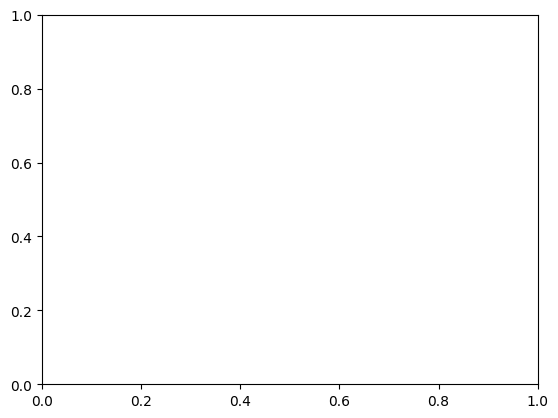

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example data (replace with your own)
methods = ["llama_1", "mice", "gbda", "crest", "crowd", "expert"]
labels = ["LLAMA-2", "MICE", "GBDA", "CREST", "Crowd", "Expert"]
bins = numpy.linspace(0, 1.05, num=20) -0.025
# Create a DataFrame with concatenated data from all methods
data = pd.DataFrame()
for name, method in zip(labels, methods):
    df = pd.read_csv(f"imdb/{method}/results_auto_eval.csv")
    data[name] = df['predict_contrast_prob']

# Calculate the middle of each bin
bin_centers = bins[:-1] + 0.5 * np.diff(bins)

# Create a scatter plot with connecting lines
for i, name in enumerate(labels):
    plt.scatter(bin_centers, data[name], label=name, marker='o', alpha=0.6)

    # Connect the dots with lines
    for j in range(len(bin_centers) - 1):
        plt.plot([bin_centers[j], bin_centers[j + 1]], [data[name][j], data[name][j + 1]], '-r', alpha=0.4)

# Adding labels and title
plt.xlabel('P(y\')')
plt.ylabel('#Instances')
plt.title('Dot Plot with Connecting Lines')

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.savefig('plot_imdb.pdf', bbox_inches='tight')
plt.show()


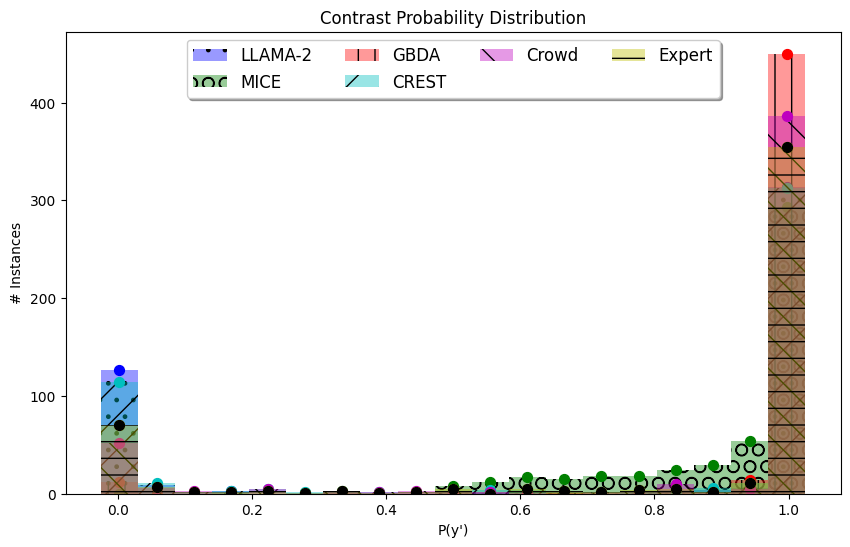

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create bins
bins = np.linspace(0, 1.05, num=20) - 0.025

# Read data
methods = ["llama_1", "mice", "gbda", "crest", "crowd", "expert"]
labels = ["LLAMA-2", "MICE", "GBDA", "CREST", "Crowd", "Expert"]
colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(10, 6))

for hatch, name, method, color in zip(['.', 'O', '|', '/', '\\', '-'], labels, methods, colors):
    df = pd.read_csv(f"imdb/{method}/results_auto_eval.csv")
    hist, edges, _ = plt.hist(df['predict_contrast_prob'].to_list(), bins=bins, alpha=0.4, label=name, hatch=hatch, color=color)
    # Add dots in the middle of each bar
    x_vals = (edges[:-1] + edges[1:]) / 2
    y_vals = hist
    plt.scatter(x_vals, y_vals, color=color, marker='o', s=50)

# Plot the original data
df = pd.read_csv(f"imdb/{method}/results_auto_eval.csv")
# hist, _, _ = plt.hist(df['orig_contrast_probs'].to_list(), bins=bins, alpha=0.4, label="Original", color='k', hatch='x')
x_vals = (edges[:-1] + edges[1:]) / 2
y_vals = hist
plt.scatter(x_vals, y_vals, color='k', marker='o', s=50)

# Adding labels and title
plt.xlabel('P(y\')')
plt.ylabel('# Instances')
plt.title('Contrast Probability Distribution')

# Adding legend on the top
plt.legend(loc='upper center', fancybox=True, shadow=True, ncol=4, fontsize='large')

# Save the plot
# plt.savefig('plot_imdb.pdf', bbox_inches='tight')

# Display the plot
plt.show()
